Guillermo Esteban Herrero, Biotecnología (Universidad de Valencia)

# TAREA 1 - BIOINFORMÁTICA

## Introducción
La proteína humana CHRM1 (*Muscarinic acetylcholine receptor M1*) es uno de los receptores muscarínicos del neurotransmisor acetilcolina (forma parte de uno de los dos tipos de receptores de acetilcolina en vertebrados). Con un tamaño de 460 aminoácidos, está implicado en varias respuestas celulares diferentes, incluyendo la inhibición de la adenilato ciclasa, la modulación de canales de potasio a través de la actuación de proteínas G o el metabolismo del fosfatidilinositol. Según Viscardi *et al* (2021) apareció durante la evolución temprana de los animales, en el último linaje del antepasado común entre cordados y cnidarios. También se le relaciona con las proteínas CHRNA3 y CRNA7 (dos subunidades parálogas de receptor nicotínico de acetilcolina).

El objetivo de la tarea es explorar la distribución taxonómica de las secuencias homólogas de esta proteína de *Homo sapiens*.

## Preparación del ambiente de computación
Debemos destacar el uso del ejemplo del cuaderno `Ejemplo.ipynb` dentro de Jupyterlab. Para poder realizar el análisis necesitamos: 

1. Instalar BLAST.
2. Descomprimir el archivo taxdb.btd.gz

Podemos hacerlo de forma automática desde R ejecutando un *script* de BASH: `preparar_ambiente.sh`, localizado en el bloque de abajo (no es necesario salir del cuaderno):

In [1]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

## Métodos
La base de datos de secuencias en la que vamos a buscar homologías és Swissprot, debido a que se encuentra instalada localmente en el ambiente.

Vamos a utilizar **blastp** (Altschul *et al.*, 1990) con diferentes umbrales de valor E, para determinar a qué ritmo aumenta la distribución taxonómica de las secuencias encontradas a medida que se relaja el grado de similitud exigido. Es decir, a medida que acepto como resultados del **blastp** secuencias con un valor E mayor. 

## Resultados
### BLASTP individual
Lo primero que hacemos es ejecutar una única búsqueda con **blastp**, usando un umbral de valor E de 1.0e-60, que es muy exigente (únicamente las secuencias extremadamente parecidas a la original apareceran en los resultados). Utilizamos la *query* de CHRM1, disponible en formato FASTA (CHRM1.fas)

In [2]:
# Observa entre los argumentes la especificación del formato de salida,
# "-outfmt". Si hace falta, desliza la barra para visualizar la línea completa.
# su significado lo explicamos más abajo.

BlastpOut01 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                              '-evalue', '1.0e-60',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

# El resultado del comando anterior, guardado en "BlastpOut01", es un montón de
# texto plano. Con las funciones textConnection() y read.table(), lo transformamos
# en un "data frame", una tabla donde cada columna es una variable. La opción
# "col.names" en read.table() sirve para dar nombre a las columnas.

TablaOut01 <- read.table(textConnection(BlastpOut01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

# Para conocer las dimensiones que tiene la tabla que hemos creado:
dim(TablaOut01)

[1] 34 11

In [3]:
TablaOut01

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


La tabla de resultados incluye 34 secuencias encontradas, incluyendo la misma secuencia usada como *query*. El significado de las 11 columnas de la tabla se explica a continuación:

- **saccver**: número de acceso o identificador de la secuencia encontrada (*subject*).
- **pident**: porcentaje de identidad entre la *query* y el *subject* en su alineamiento local.
- **length**: longitud del alineamiento entre *query* y *subject*.
- **qstart**: primera posición de la *query* alineada.
- **qend**: última posición alineada en la *query*.
- **sstart**: primera posición de la *subject* alineada.
- **send**: última posición de la *subject* alineada.
- **evalue**: valor E del alineamiento. Es decir, número de alineamientos de igual o mejor puntuación esperados por azar en una base de datos igual de grande.
- **staxid**: identificador de la especie a la que pertenece la *subject*, en la base de datos de taxonomía del NCBI.
- **ssciname**: nombre científico de la especie a la que pertenece la *subject*.
- **sblastname**: nombre de un grupo taxonómico de rango superior al que pertenece la *subject*, usado para facilitar la interpretación.

### BLASTP en serie
Como queremos visualizar cómo aumenta el número de secuencias a medida que aumenta el umbral de valor E, vamos a repetir la búsqueda unas cuantas veces, con valores del parámetro `-evalue` diferentes. Se puede hacer automáticamente si hacemos uso de la función `lapply()`. El código siguiente ejecutará una búsqueda de **blastp** para cada valor del vector `Valores_E_maximos`. El resultado será una lista de tablas, como la anterior. 

In [4]:
Valores_E_maximos <- c('1.0e-60', '1.0e-50', '1.0e-40', '1.0e-35', '1.0e-30',
                       '1.0e-25', '1.0e-20', '1.0e-010', '1.0e-05', '1')

# La función lapply() aplicará una función (segundo argumento) sobre
# cada uno de los valores de la lista o vector indicados en el primer
# argumento (Valores_E_maximos, en este caso). La función que aplicamos
# la definimos entre llaves ("{}"). Incluye todos los pasos necesarios
# para obtener una tabla de resultados como la anterior.

Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRM1.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

Se puede ir jugando con los valores E para ver cómo van cambiando las tablas y los siguientes bloques.

El objeto `Lista_de_Tablas` guarda las tablas de resultados de los diez **blastp** ejecutados. Podemos acceder a cada tabla individual cambiando el número que se encuentra entre los dobles corchetes (si hemos añadido diez E valores, se pueden poner el número del uno al diez):

In [6]:
tail(Lista_de_Tablas[[1]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
29,P30372.1,44.444,459,2,437,3,459,2.76e-132,9031,Gallus gallus,birds
30,P30544.1,45.975,472,18,438,25,478,1.12e-129,8355,Xenopus laevis,frogs & toads
31,P08911.1,73.488,215,20,234,24,238,9.43e-111,10116,Rattus norvegicus,rodents
32,Q920H4.2,74.882,211,20,230,25,235,9.45e-110,10090,Mus musculus,rodents
33,P16395.2,53.061,245,12,251,87,323,3.30e-77,7227,Drosophila melanogaster,flies
34,Q9U7D5.2,50.000,208,24,230,64,271,1.08e-66,6239,Caenorhabditis elegans,nematodes


Para saber cuántas secuencias homólogas ha encontrado **blastp** en la base de datos con cada valor del parámetro `-evalue`, aplico la función `dim()` que devuelve las dimensiones del objeto en cuestión (número de filas y de columnas) y me quedo con la primera dimensión (número de filas):

In [7]:
Numero_de_resultados <- sapply(Lista_de_Tablas, function(x) dim(x)[1])
Numero_de_resultados

[1]  34  37  53  70  94 167 249 485 676 774

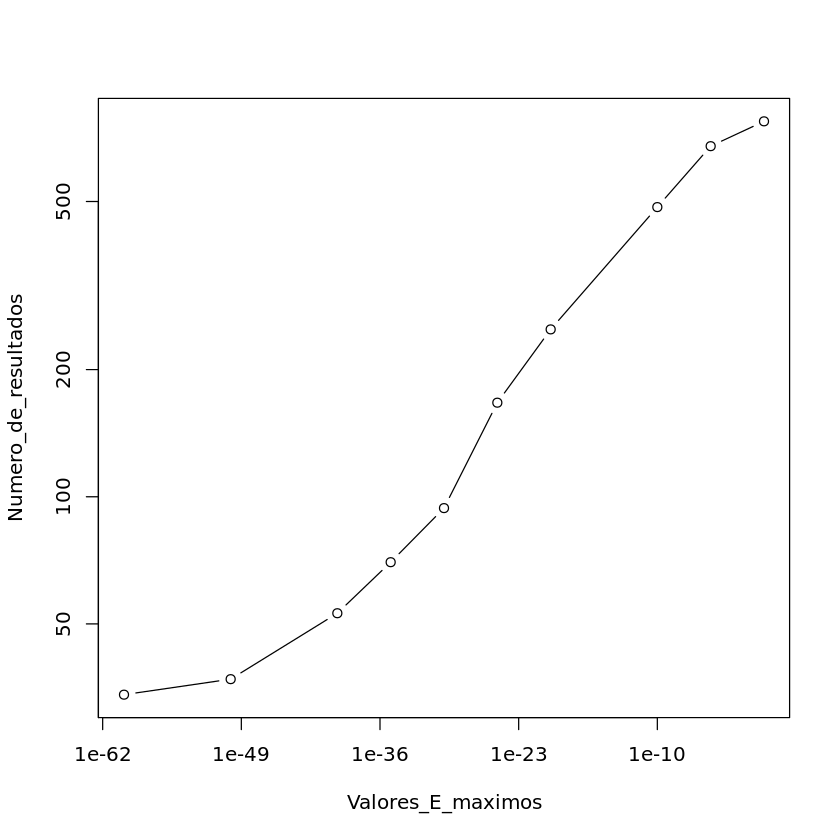

In [8]:
# En la representación gráfica, podemos usar escala logarítmica solamente
# en un eje ("log='x'"), en los dos, o en ninguno.
plot(Valores_E_maximos, Numero_de_resultados, log = 'xy', type = 'b')

A continuación, examinamos qué tipo de relación hay entre la longitud del alineamiento y el valor E de los resultados guardados en la última tabla, la número 10, en la que he usado un valor E de 1 y que contiene un mayor número de resultados.

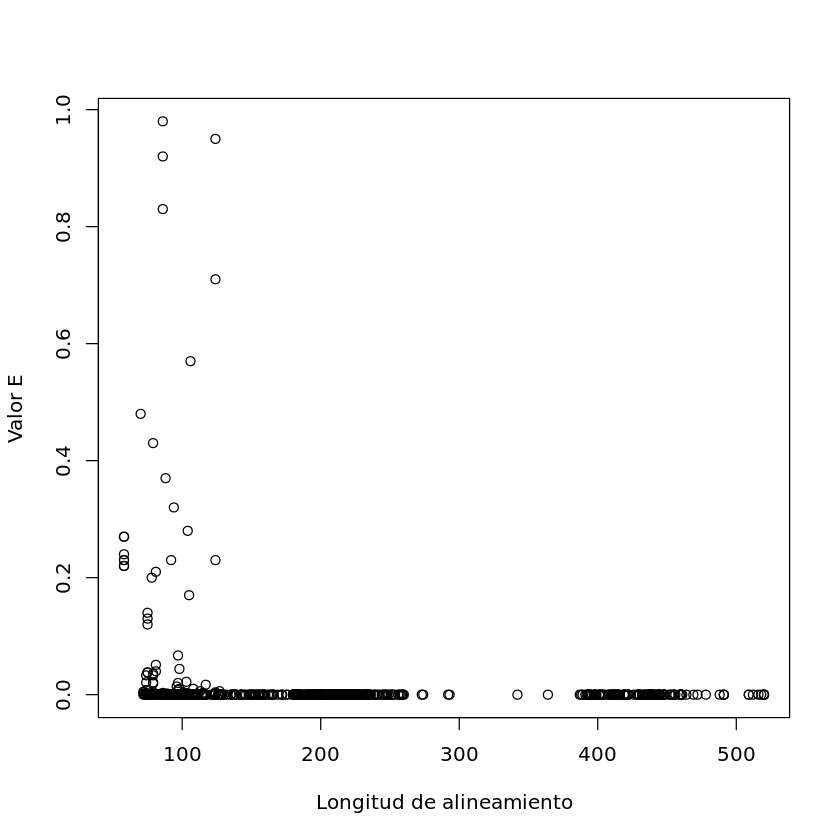

In [9]:
# El símbolo "$" extrae de un "data frame" una columna. Si ejecutas
# "Lista_de_Tablas[[3]]$length", verás que el resultado es el vector
# de las longitudes de los alineamientos de la tercera tabla, por ejemplo.
plot(Lista_de_Tablas[[10]]$length, Lista_de_Tablas[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

Aunque CHRM1 es una proteína de 460 aminoácidos, existen varios alineamientos: uno de aproximadamente 200 (puede que sean dos de 100) y otro de menos de 100. Esto indica que existen muchas proteínas en la base de datos que presentan homología **parcial** con CHRM1. Es decir, que muchos de estos resultados corresponden a proteínas que solo se parecen a CHRM1 en un fragmento concreto; probablemente un dominio de función conservada. Cabe preguntar qué posiciones de CHRM1 son esas que participan en los alineamientos parciales. 

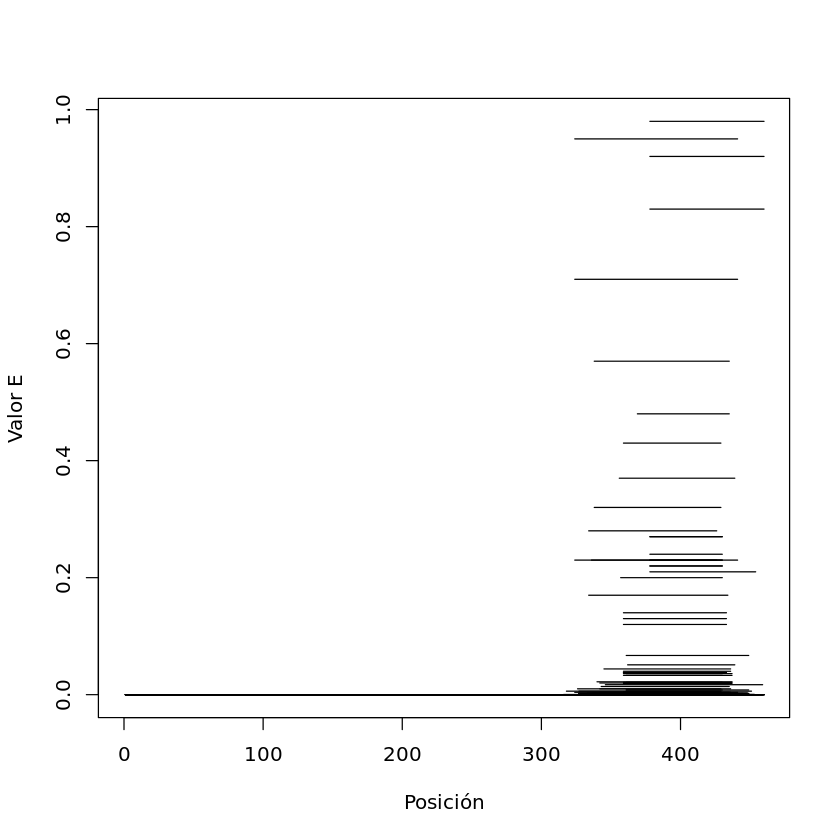

In [10]:
inicios <- Lista_de_Tablas[[10]]$qstart
finales <- Lista_de_Tablas[[10]]$qend
valoresE <- Lista_de_Tablas[[10]]$evalue

# La función segments() añade segmentos a un gráfico previo. Por eso, represento
# antes un gráfico con los rangos adecuados, pero vacío (type='n'). Para determinar
# el rango del eje horizontal, determino primero el valor máximo de "qend".
AlineamientoMaximo <- max(Lista_de_Tablas[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

Esta gráfica muestra que la homología encontrada con valores E mayores no está distribuída aleatoriamente a lo largo de la secuencia de CHRM1, sino que, efectivamente, se concentra sobre la posición 400, aproximadamente (350-450).

Por último, vamos a explorar la distribución taxonómica de las secuencias encontradas. La columna `sblastname` nos ofrece una clasificación fácilmente interpretable de las secuencias. Una posibilidad es contar en cada tabla las secuencias encontradas de cada grupo taxonómico. Para ello, aplico la función `table()` a esa columna de cada tabla en `Lista_de_Tablas`:

In [11]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

              birds even-toed ungulates               flies       frogs & toads 
                  3                   5                   1                   1 
          nematodes            primates             rodents 
                  1                  13                  10 

[[2]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rodents 
                  1                   1                  13                  12 

[[3]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  1                   1                   1                   1 
           primates             rodents 
    

El resultado del código anterior es una lista de recuentos de los diferentes grupos taxonómicos presentes en cada tabla de resultados de **blastp**. Podemos observar, por ejemplo, que en los resultados del tercer **blastp** (umbral de valor E de $10^{-40}$) empiezan a aprecer secuencias homólogas a CHRM1 procedentes a invertebrados como algún grupo de insectos.

Puesto que CHRM1 es un receptor en organismos vertebrados, cabe suponer que solo las proteínas homólogas con valores E menores y con alineamientos más completos conservan una misma función en la transmisión de acetilcolina. Para ver la relación entre la longitud del alineamiento y la distribución taxonómica, a continuación repito el recuento de grupos taxonómicos pero contando solamente las secuencias con un alineamiento de al menos 400 aminoácidos:

In [3]:
lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 400
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds even-toed ungulates               flies       frogs & toads 
                  3                   5                   0                   1 
          nematodes            primates             rodents 
                  0                  13                   8 

[[2]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   0 
      frogs & toads           nematodes            primates             rodents 
                  1                   0                  13                  10 

[[3]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  0                   1                   1                   0 
           primates             rodents 
    

## Discusión
Hemos utilizado la secuencia de la proteína CHRM1 de *Homo sapiens* como consulta (*query*) en búsquedas de **blastp**, y encontramos proteínas homólogas en multitud de especies, incluyendo vertebrados e invertebrados (primates, moscas, ungulados...). Sabiendo que CHRM1 es una proteína específica de vertebrados (en concreto de humanos), puede sorprender que existan homólogas en tal diversidad de organismos. 

La distribución de los alineamientos a lo largo de la secuencia de CHRM1 (de 460 aminoácidos) muestra que gran parte de la homología encontrada se limita a una región de poco más de 100 aminoácidos, aproximadamente entre los resíduos 350 y 450. Esta región consituye un dominio conservado. 

Por último, cabe señalar que no se han encontrado homólogos de CHRM1 en cnetóforos, poríferos, placozoa, hongos ni plantas. Parece ser que las observaciones de Viscardi *et al* (2021) eran correctas, o al menos aun no se han registrado en esos organismos en la base de datos.

## Referencias
- Stephen F. Altschul, Warren Gish, Webb Miller, Eugene W. Myers and David J. Lipman. Basic local alignment search tool, *Journal of Molecular Biology*, Volume 215, Issue 3, 1990, Pages 403-410, [doi:10.1016/S0022-2836(05)80360-2](https://doi.org/10.1016/S0022-2836(05)80360-2).

- Lucas Henriques Viscardi, Danilo Oliveira Imparato, Maria Cátira Bortolini, Rodrigo Juliani Siqueira Dalmolin, Ionotropic Receptors as a Driving Force behind Human Synapse Establishment, Molecular Biology and Evolution, Volume 38, Issue 3, March 2021, Pages 735-744, [doi:10.1093/molbev/msaa252](https://doi.org/10.1093/molbev/msaa252)

- Allard, W., Sigal, I. S., & Dixon, R. A. Sequence of the gene encoding the human M1 muscarinic acetylcholine receptor. Nucleic Acids Research, Volume 15, Issue 24, 1987, 10604. [doi:10.1093/nar/15.24.10604](https://doi.org/10.1093/nar/15.24.10604)

